In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from heapq import heappop, heappush
from random import randint
from datetime import datetime
%matplotlib inline

from src.grid import intersect_cells, Map
from src.theta import Node, theta, make_path
from src.lazy_theta import lazy_theta
from src.theta_ap import theta_ap
from src.utils import *
from src.search_tree import *

In [2]:
def draw_intersect(width, height, i1, j1, i2, j2):
    '''
    Auxiliary function that visualizes the environment, the path and 
    the open/expanded/re-expanded nodes.
    
    The function assumes that nodes_opened/nodes_expanded/nodes_reexpanded
    are iterable collestions of SearchNodes
    '''
    k = 50
    r = 0.05 * k
    h_im = height * k
    w_im = width * k
    im = Image.new('RGB', (w_im, h_im), color = 'white')
    draw = ImageDraw.Draw(im)
    
    
    cells = intersect_cells(i1, j1, i2, j2)
    
    for cell in cells:
        i = cell[0]
        j = cell[1]
        draw.rectangle((j * k, i * k, (j + 1) * k - 1, (i + 1) * k - 1), fill=(231, 76, 60))
        
    # grid points
    for i in range(height + 1):
        for j in range(width + 1):
            draw.ellipse((j * k - r, i * k - r, j * k + r, i * k + r), fill=(50, 50, 50))
            
    draw.line((j1 * k, i1*k, j2 * k, i2 * k),  fill=( 70, 80, 80 ))
        

    _, ax = plt.subplots(dpi=150)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.imshow(np.asarray(im))
    plt.show()

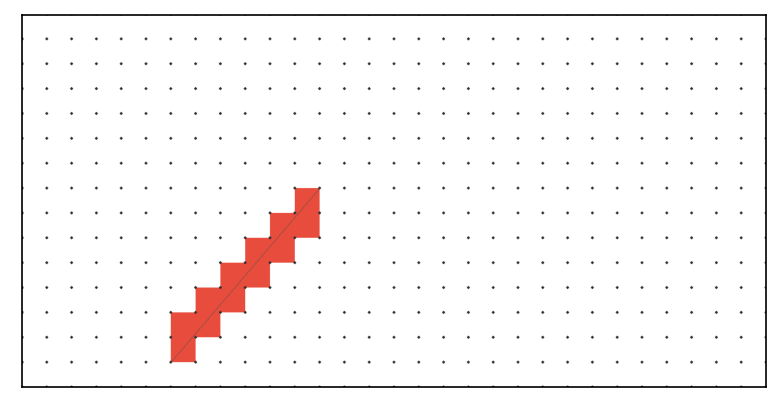

In [3]:
draw_intersect(30, 15, 14, 6, 7, 12)

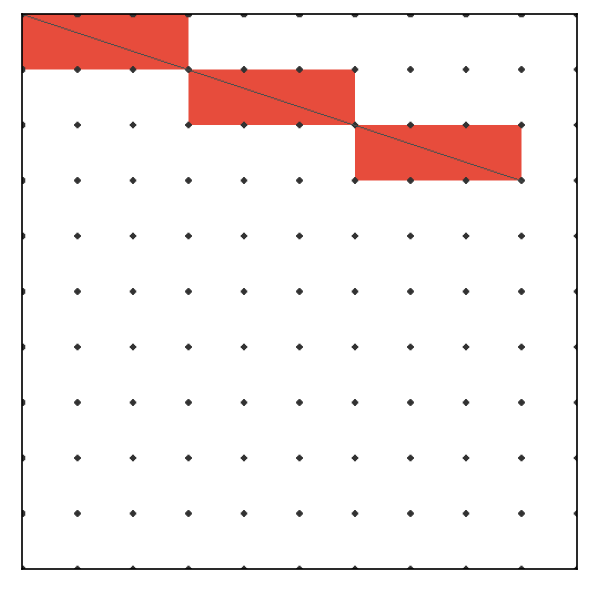

In [4]:
draw_intersect(10, 10, 0, 0, 3, 9)


In [5]:
def draw(grid_map, start = None, goal = None, path = None,
         nodes_opened = None, nodes_expanded = None, nodes_reexpanded = None):
    '''
    Auxiliary function that visualizes the environment, the path and 
    the open/expanded/re-expanded nodes.
    
    The function assumes that nodes_opened/nodes_expanded/nodes_reexpanded
    are iterable collestions of SearchNodes
    '''
    k = 15
    r = 0.3 * k
    rr = 0.1 * k
    height, width = grid_map.get_size()
    h_im = height * k
    w_im = width * k
    im = Image.new('RGB', (w_im, h_im), color = 'white')
    draw = ImageDraw.Draw(im)
    
    # grid points
    for i in range(height + 1):
        for j in range(width + 1):
            pass
            draw.ellipse((j * k - rr, i * k - rr, j * k + rr, i * k + rr), fill=(50, 50, 50))
    
    # obstacles
    for i in range(height):
        for j in range(width):
            if(not grid_map.traversable(i, j)):
                draw.rectangle((j * k, i * k, (j + 1) * k - 1, (i + 1) * k - 1), fill=( 70, 80, 80 ))

    # opened
    if nodes_opened is not None:
        for node in nodes_opened:
            pass
#            draw.rectangle((node.j * k, node.i * k, (node.j + 1) * k - 1, (node.i + 1) * k - 1), fill=(213, 219, 219), width=0)
    
    # expanded
    if nodes_expanded is not None:
        for node in nodes_expanded:
            pass
#            draw.rectangle((node.j * k, node.i * k, (node.j + 1) * k - 1, (node.i + 1) * k - 1), fill=(131, 145, 146), width=0)
    
    # reexpanded
    if nodes_reexpanded is not None:
        for node in nodes_reexpanded:
            pass
#                draw.rectangle((node.j * k, node.i * k, (node.j + 1) * k - 1, (node.i + 1) * k - 1), fill=(255, 145, 146), width=0)
    
    # path
    if path is not None:
        for step in path:
            draw.line(((step.j * k, step.i * k), (step.parent.j * k, step.parent.i * k)), fill=(219, 152, 52))
            draw.ellipse((step.j * k - r, step.i * k - r, step.j * k + r, step.i * k + r), fill=(52, 152, 219))
                

    if (start is not None):
        draw.ellipse((start.j * k - r, start.i * k - r, start.j * k + r, start.i * k + r), fill=(40, 180, 99))
    
    if (goal is not None):
        draw.ellipse((goal.j * k - r, goal.i * k - r, goal.j * k + r, goal.i * k + r), fill=(231, 76, 60))


    _, ax = plt.subplots(dpi=150)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.imshow(np.asarray(im))
    plt.show()

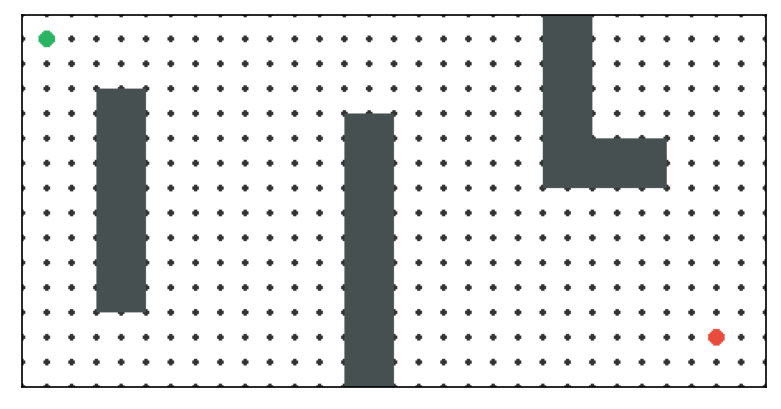

In [6]:
height = 15
width = 30
map_str = '''
.....................@@.......
.....................@@.......
.....................@@.......
...@@................@@.......
...@@........@@......@@.......
...@@........@@......@@@@@....
...@@........@@......@@@@@....
...@@........@@...............
...@@........@@...............
...@@........@@...............
...@@........@@...............
...@@........@@...............
.............@@...............
.............@@...............
.............@@...............
'''

test_map = Map()
test_map.read_from_string(map_str, width, height)
start = Node(1, 1)
goal = Node(13, 28)
draw(test_map, start, goal)

In [7]:
def hard_test(search_func, task, *args, **kwargs):
    '''
    simple_test runs search_func on one task (use a number from 0 to 25 to choose a certain debug task on simple map or None to choose a random task from this pool) with *args as optional arguments and displays:
     - 'Path found!' and some statistics -- path was found
     - 'Path not found!' -- path was not found
     - 'Execution error' -- an error occurred while executing the SearchFunction In first two cases function also draws visualisation of the task
    '''
    
    height = 5
    width = 5
    map_str = '''
.....
..@..
..@..
..@..
.....
'''

    task_map = Map()
    task_map.read_from_string(map_str, width, height)
    starts = [(2, 0)]
    goals = [(2, 5)]

    if (task is None) or not (0 <= task < len(starts)):
        task = randint(0, len(starts) - 1)
        
    print("task number: ", task)

    start = Node(*starts[task])
    goal = Node(*goals[task])
    try:
        result = search_func(task_map, start.i, start.j, goal.i, goal.j, *args, **kwargs)
        number_of_steps = result[2].expansions
        nodes_created = result[2].max_tree_size
        if result[0]:
            path = make_path(result[1])
            print("Path found! Length: " + str(result[2].way_length) + \
                ". Memory_usage: " + str(nodes_created) + \
                ". Number of steps: " + str(number_of_steps))
            path_cells = [(node.i, node.j) for node in path[0]]
            print(path_cells)
            draw(task_map, start, goal, path[0], *result[3:])
        else:
            print("Path not found!")
        return result

    except Exception as e:
        print("Execution error")
        print(e)

In [8]:
def simple_test(search_func, task, *args, **kwargs):
    '''
    simple_test runs search_func on one task (use a number from 0 to 25 to choose a certain debug task on simple map or None to choose a random task from this pool) with *args as optional arguments and displays:
     - 'Path found!' and some statistics -- path was found
     - 'Path not found!' -- path was not found
     - 'Execution error' -- an error occurred while executing the SearchFunction In first two cases function also draws visualisation of the task
    '''
    
    height = 15
    width = 30
    map_str = '''
..............................
..............................
..............................
..............................
..............................
..............................
@@@@@@@@@@@@@@@@@@@@@@........
@@@@@@@@@@@@@@@@@@@@@@@.......
..............................
.............@@@@@@@@@@@@@@@@@
..............................
..............................
..............................
..............................
..............................
'''

    task_map = Map()
    task_map.read_from_string(map_str, width, height)
    starts = [(5, 18)]
    goals = [(12, 18)]

    if (task is None) or not (0 <= task < len(starts)):
        task = randint(0, len(starts) - 1)
        
    print("task number: ", task)

    start = Node(*starts[task])
    goal = Node(*goals[task])
    try:
        result = search_func(task_map, start.i, start.j, goal.i, goal.j, *args, **kwargs)
        number_of_steps = result[2].expansions
        nodes_created = result[2].max_tree_size
        if result[0]:
            path = make_path(result[1])
            print("Path found! Length: " + str(result[2].way_length) + \
                ". Memory_usage: " + str(nodes_created) + \
                ". Number of steps: " + str(number_of_steps))
            path_cells = [(node.i, node.j) for node in path[0]]
            print(path_cells)
            draw(task_map, start, goal, path[0], *result[3:])
        else:
            print("Path not found!")
        return result

    except Exception as e:
        print("Execution error")
        print(e)


task number:  0
get 2, 0 prev 2, 0 parent 2, 0
update bounds node  2 0
Updated:  2 0 lv:  (0, 0)  uv:  (0, 0)
get 2, 1 prev 2, 0 parent 2, 0
update bounds node  2 1
Updated:  2 1 lv:  (0, -1)  uv:  (0, -1)
get 2, 2 prev 2, 1 parent 2, 0
update bounds node  2 2
prev bounds lv (0, -1) uv (0, -1)
low vector by prev  (2, 1) to (0, -1)
up  vector by prev  (2, 1) to (0, -1)
low vector by point  (1, 1) to (-1, 1)
up  vector by point  (3, 1) to (1, 1)
Updated:  2 2 lv:  (-1, 1)  uv:  (1, 1)
get 1, 2 prev 2, 1 parent 2, 0
update bounds node  1 2
up  vector by cell  (1, 2) to (-1, 2)
up  vector by point  (2, 2) to (-1, 2)
low vector by point  (1, 1) to (-1, 1)
prev bounds lv (0, -1) uv (0, -1)
low vector by prev  (2, 1) to (-1, 1)
Updated:  1 2 lv:  (-1, 1)  uv:  (-1, 2)
get 3, 2 prev 2, 1 parent 2, 0
update bounds node  3 2
low vector by cell  (2, 2) to (1, 2)
up  vector by point  (3, 1) to (1, 1)
low vector by point  (2, 2) to (1, 2)
prev bounds lv (0, -1) uv (0, -1)
up  vector by prev  (2, 1)

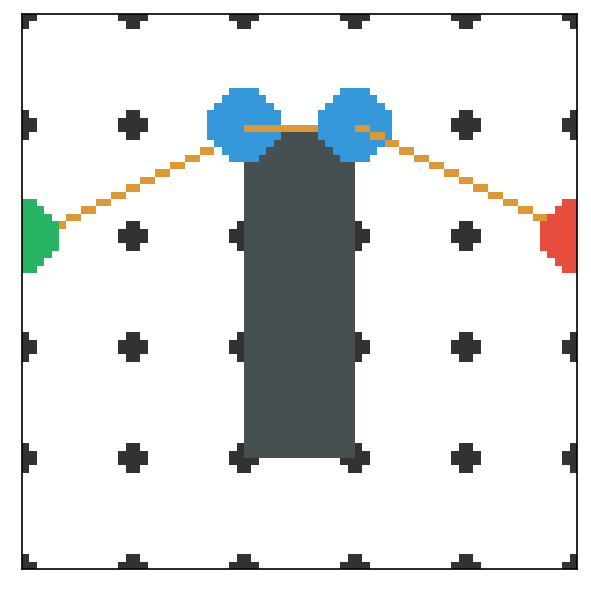

CPU times: user 84.4 ms, sys: 97.7 ms, total: 182 ms
Wall time: 77 ms


In [9]:
%time res = hard_test(theta_ap, 6, euclidian_distance, SearchTreePQS)

task number:  0
get 2, 0 prev 2, 0 parent 2, 0
update bounds node  2 0
Updated:  2 0 lv:  (0, 0)  uv:  (0, 0)
get 1, 0 prev 2, 0 parent 2, 0
update bounds node  1 0
Updated:  1 0 lv:  (1, 0)  uv:  (1, 0)
get 2, 1 prev 2, 0 parent 2, 0
update bounds node  2 1
Updated:  2 1 lv:  (0, -1)  uv:  (0, -1)
get 3, 0 prev 2, 0 parent 2, 0
update bounds node  3 0
Updated:  3 0 lv:  (-1, 0)  uv:  (-1, 0)
get 1, 1 prev 2, 0 parent 2, 0
update bounds node  1 1
up  vector by point  (2, 1) to (0, 1)
low vector by point  (1, 0) to (-1, 0)
Updated:  1 1 lv:  (-1, 0)  uv:  (0, 1)
get 3, 1 prev 2, 1 parent 2, 0
update bounds node  3 1
up  vector by point  (3, 0) to (1, 0)
prev bounds lv (0, -1) uv (0, -1)
up  vector by prev  (2, 1) to (1, 0)
Updated:  3 1 lv:  (-1, -1)  uv:  (1, 0)
get 2, 2 prev 1, 1 parent 2, 0
update bounds node  2 2
prev bounds lv (-1, 0) uv (0, 1)
low vector by prev  (1, 1) to (-1, 0)
up  vector by prev  (1, 1) to (0, 1)
up  vector by point  (3, 1) to (0, 1)
Updated:  2 2 lv:  (-1, 0)

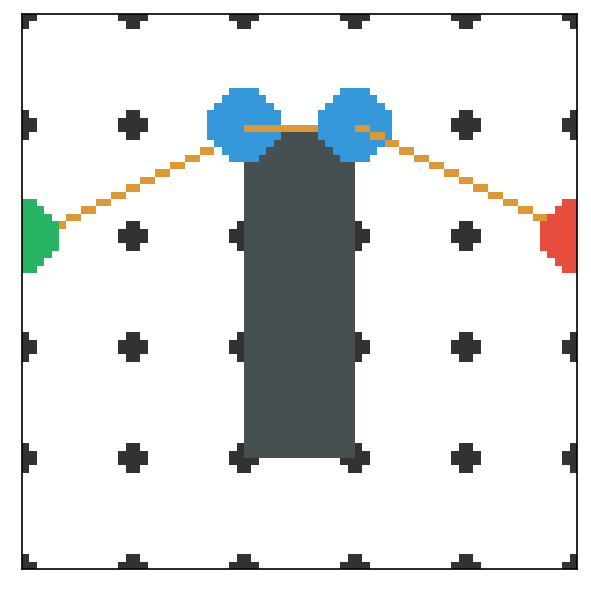

CPU times: user 129 ms, sys: 87.4 ms, total: 216 ms
Wall time: 126 ms


In [10]:
%time res = hard_test(theta_ap, 6, theta_heuristic, SearchTreePQS)

task number:  0
get 5, 18 prev 5, 18 parent 5, 18
update bounds node  5 18
Updated:  5 18 lv:  (0, 0)  uv:  (0, 0)
get 6, 18 prev 5, 18 parent 5, 18
update bounds node  6 18
Updated:  6 18 lv:  (-1, 0)  uv:  (-1, 0)
get 6, 17 prev 5, 18 parent 5, 18
update bounds node  6 17
low vector by cell  (6, 17) to (1, -1)
low vector by point  (6, 18) to (1, -1)
up  vector by point  (5, 17) to (0, -1)
Updated:  6 17 lv:  (1, -1)  uv:  (0, -1)
get 6, 19 prev 5, 18 parent 5, 18
update bounds node  6 19
up  vector by cell  (6, 18) to (1, 1)
up  vector by point  (6, 18) to (1, 1)
low vector by point  (5, 19) to (0, 1)
Updated:  6 19 lv:  (0, 1)  uv:  (1, 1)
get 5, 17 prev 5, 18 parent 5, 18
update bounds node  5 17
Updated:  5 17 lv:  (0, 1)  uv:  (0, 1)
get 5, 19 prev 5, 18 parent 5, 18
update bounds node  5 19
Updated:  5 19 lv:  (0, -1)  uv:  (0, -1)
get 6, 16 prev 5, 17 parent 5, 18
update bounds node  6 16
low vector by cell  (6, 16) to (1, -2)
low vector by point  (6, 17) to (1, -2)
up  vector 

get 0, 23 prev 1, 22 parent 5, 18
update bounds node  0 23
up  vector by point  (1, 23) to (-4, 5)
low vector by point  (0, 22) to (-5, 4)
prev bounds lv (-2, 2) uv (-3, 4)
low vector by prev  (1, 22) to (-2, 2)
up  vector by prev  (1, 22) to (-4, 5)
Updated:  0 23 lv:  (-2, 2)  uv:  (-4, 5)
get 3, 10 prev 4, 10 parent 5, 18
update bounds node  3 10
up  vector by point  (3, 11) to (-2, -7)
prev bounds lv (0, -7) uv (-2, -7)
low vector by prev  (4, 10) to (0, -7)
up  vector by prev  (4, 10) to (-2, -7)
low vector by point  (4, 11) to (-1, -7)
up  vector by point  (2, 11) to (-2, -7)
Updated:  3 10 lv:  (-1, -7)  uv:  (-2, -7)
get 3, 26 prev 3, 25 parent 5, 18
update bounds node  3 26
up  vector by point  (4, 26) to (-1, 8)
prev bounds lv (-1, 3) uv (-1, 6)
low vector by prev  (3, 25) to (-1, 3)
up  vector by prev  (3, 25) to (-1, 6)
low vector by point  (2, 25) to (-1, 3)
up  vector by point  (4, 25) to (-1, 6)
Updated:  3 26 lv:  (-1, 3)  uv:  (-1, 6)
get 5, 9 prev 4, 10 parent 5, 18
u

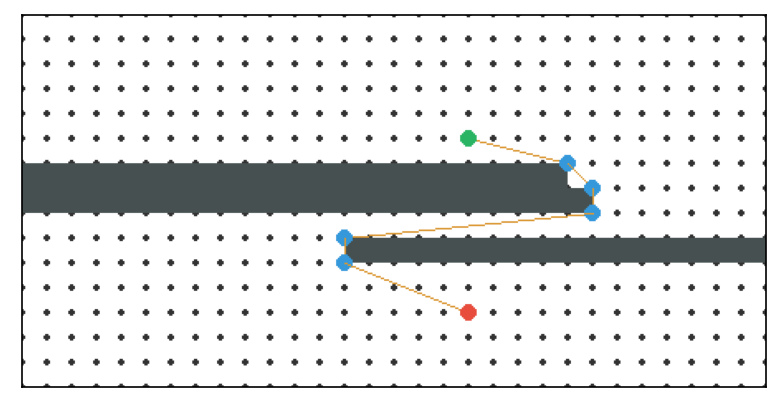

CPU times: user 169 ms, sys: 126 ms, total: 295 ms
Wall time: 171 ms


In [11]:
%time res = simple_test(theta_ap, 6, euclidian_distance, SearchTreePQS)

task number:  0
get 5, 18 prev 5, 18 parent 5, 18
update bounds node  5 18
Updated:  5 18 lv:  (0, 0)  uv:  (0, 0)
get 6, 18 prev 5, 18 parent 5, 18
update bounds node  6 18
Updated:  6 18 lv:  (-1, 0)  uv:  (-1, 0)
get 6, 17 prev 5, 18 parent 5, 18
update bounds node  6 17
low vector by cell  (6, 17) to (1, -1)
low vector by point  (6, 18) to (1, -1)
up  vector by point  (5, 17) to (0, -1)
Updated:  6 17 lv:  (1, -1)  uv:  (0, -1)
get 6, 19 prev 5, 18 parent 5, 18
update bounds node  6 19
up  vector by cell  (6, 18) to (1, 1)
up  vector by point  (6, 18) to (1, 1)
low vector by point  (5, 19) to (0, 1)
Updated:  6 19 lv:  (0, 1)  uv:  (1, 1)
get 5, 17 prev 5, 18 parent 5, 18
update bounds node  5 17
Updated:  5 17 lv:  (0, 1)  uv:  (0, 1)
get 5, 19 prev 5, 18 parent 5, 18
update bounds node  5 19
Updated:  5 19 lv:  (0, -1)  uv:  (0, -1)
get 6, 16 prev 5, 17 parent 5, 18
update bounds node  6 16
low vector by cell  (6, 16) to (1, -2)
low vector by point  (6, 17) to (1, -2)
up  vector 

get 1, 20 prev 2, 19 parent 5, 18
update bounds node  1 20
up  vector by point  (2, 20) to (-3, 2)
low vector by point  (1, 19) to (-4, 1)
up  vector by point  (2, 21) to (-3, 2)
prev bounds lv (-2, 0) uv (-2, 2)
low vector by prev  (2, 19) to (-4, 1)
up  vector by prev  (2, 19) to (-3, 2)
Updated:  1 20 lv:  (-4, 1)  uv:  (-3, 2)
get 3, 13 prev 4, 14 parent 5, 18
update bounds node  3 13
up  vector by point  (3, 14) to (-2, -4)
low vector by point  (4, 13) to (-1, -5)
prev bounds lv (0, -3) uv (-2, -3)
low vector by prev  (4, 14) to (-1, -5)
up  vector by prev  (4, 14) to (-2, -4)
up  vector by point  (2, 14) to (-2, -4)
Updated:  3 13 lv:  (-1, -5)  uv:  (-2, -4)
get 3, 23 prev 3, 22 parent 5, 18
update bounds node  3 23
up  vector by point  (4, 23) to (-1, 5)
prev bounds lv (-2, 3) uv (-1, 4)
low vector by prev  (3, 22) to (-2, 3)
up  vector by prev  (3, 22) to (-1, 4)
low vector by point  (2, 22) to (-2, 3)
up  vector by point  (4, 22) to (-1, 4)
Updated:  3 23 lv:  (-2, 3)  uv:  (

get 4, 10 prev 4, 11 parent 5, 18
update bounds node  4 10
prev bounds lv (0, -6) uv (-2, -6)
low vector by prev  (4, 11) to (0, -6)
up  vector by prev  (4, 11) to (-2, -6)
low vector by point  (5, 10) to (0, -8)
low vector by point  (5, 11) to (0, -7)
up  vector by point  (3, 11) to (-2, -7)
Updated:  4 10 lv:  (0, -7)  uv:  (-2, -7)
get 4, 26 prev 5, 25 parent 5, 18
update bounds node  4 26
up  vector by point  (5, 26) to (0, 8)
low vector by point  (4, 25) to (-1, 7)
low vector by point  (3, 25) to (-1, 7)
prev bounds lv (-1, 5) uv (0, 3)
low vector by prev  (5, 25) to (-1, 7)
up  vector by prev  (5, 25) to (0, 3)
Updated:  4 26 lv:  (-1, 7)  uv:  (0, 3)
get 7, 27 prev 6, 26 parent 5, 18
update bounds node  7 27
up  vector by point  (7, 26) to (2, 8)
low vector by point  (6, 27) to (1, 9)
prev bounds lv (0, 7) uv (1, 4)
low vector by prev  (6, 26) to (1, 9)
up  vector by prev  (6, 26) to (1, 4)
up  vector by point  (8, 26) to (1, 4)
Updated:  7 27 lv:  (1, 9)  uv:  (1, 4)
get 1, 12 

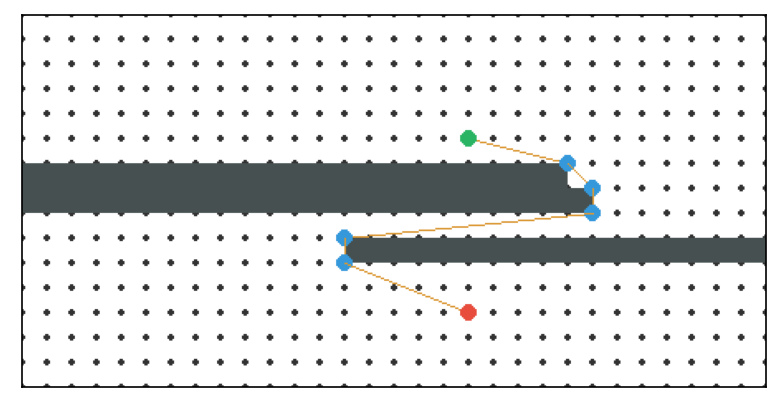

CPU times: user 181 ms, sys: 159 ms, total: 340 ms
Wall time: 164 ms


In [12]:
%time res = simple_test(theta_ap, 6, weighted_heuristic, SearchTreePQS)

task number:  0
get 5, 18 prev 5, 18 parent 5, 18
update bounds node  5 18
Updated:  5 18 lv:  (0, 0)  uv:  (0, 0)
get 4, 18 prev 5, 18 parent 5, 18
update bounds node  4 18
Updated:  4 18 lv:  (1, 0)  uv:  (1, 0)
get 5, 17 prev 5, 18 parent 5, 18
update bounds node  5 17
Updated:  5 17 lv:  (0, 1)  uv:  (0, 1)
get 5, 19 prev 5, 18 parent 5, 18
update bounds node  5 19
Updated:  5 19 lv:  (0, -1)  uv:  (0, -1)
get 6, 18 prev 5, 18 parent 5, 18
update bounds node  6 18
Updated:  6 18 lv:  (-1, 0)  uv:  (-1, 0)
get 4, 17 prev 5, 18 parent 5, 18
update bounds node  4 17
up  vector by point  (4, 18) to (-1, 0)
low vector by point  (5, 17) to (0, -1)
Updated:  4 17 lv:  (0, -1)  uv:  (-1, 0)
get 4, 19 prev 5, 18 parent 5, 18
update bounds node  4 19
up  vector by point  (5, 19) to (0, 1)
low vector by point  (4, 18) to (-1, 0)
Updated:  4 19 lv:  (-1, 0)  uv:  (0, 1)
get 6, 17 prev 5, 18 parent 5, 18
update bounds node  6 17
low vector by cell  (6, 17) to (1, -1)
low vector by point  (6, 18

get 6, 8 prev 5, 9 parent 5, 18
update bounds node  6 8
low vector by cell  (6, 8) to (1, -10)
low vector by point  (6, 9) to (1, -10)
up  vector by point  (5, 8) to (0, -10)
prev bounds lv (1, -8) uv (0, -7)
low vector by prev  (5, 9) to (1, -10)
up  vector by prev  (5, 9) to (0, -7)
Updated:  6 8 lv:  (1, -10)  uv:  (0, -7)
get 6, 28 prev 5, 28 parent 5, 18
update bounds node  6 28
up  vector by point  (6, 27) to (1, 9)
prev bounds lv (0, 8) uv (1, 8)
low vector by prev  (5, 28) to (0, 8)
up  vector by prev  (5, 28) to (1, 9)
low vector by point  (5, 27) to (0, 9)
up  vector by point  (7, 27) to (1, 9)
Updated:  6 28 lv:  (0, 9)  uv:  (1, 9)
get 3, 8 prev 4, 9 parent 5, 18
update bounds node  3 8
up  vector by point  (3, 9) to (-2, -9)
low vector by point  (4, 8) to (-1, -10)
prev bounds lv (0, -8) uv (-1, -5)
low vector by prev  (4, 9) to (-1, -10)
up  vector by prev  (4, 9) to (-1, -5)
up  vector by point  (2, 9) to (-1, -5)
Updated:  3 8 lv:  (-1, -10)  uv:  (-1, -5)
get 3, 28 pre

get 6, 5 prev 5, 6 parent 5, 18
update bounds node  6 5
low vector by cell  (6, 5) to (1, -13)
low vector by point  (6, 6) to (1, -13)
up  vector by point  (5, 5) to (0, -13)
prev bounds lv (1, -11) uv (0, -10)
low vector by prev  (5, 6) to (1, -13)
up  vector by prev  (5, 6) to (0, -10)
Updated:  6 5 lv:  (1, -13)  uv:  (0, -10)
get 9, 23 prev 8, 23 parent 7, 23
update bounds node  9 23
prev bounds lv (-1, 0) uv (1, 0)
low vector by prev  (8, 23) to (-1, 0)
up  vector by prev  (8, 23) to (1, 0)
up  vector by point  (8, 22) to (1, 0)
low vector by point  (8, 24) to (1, 1)
Updated:  9 23 lv:  (1, 1)  uv:  (1, 0)
get 3, 5 prev 3, 6 parent 5, 18
update bounds node  3 5
prev bounds lv (-1, -10) uv (-1, -5)
low vector by prev  (3, 6) to (-1, -10)
up  vector by prev  (3, 6) to (-1, -5)
low vector by point  (4, 5) to (-1, -10)
low vector by point  (4, 6) to (-1, -10)
up  vector by point  (2, 6) to (-1, -5)
Updated:  3 5 lv:  (-1, -10)  uv:  (-1, -5)
get 9, 24 prev 8, 23 parent 7, 23
update bo

get 2, 7 prev 3, 8 parent 3, 8
update bounds node  2 7
up  vector by point  (2, 8) to (-1, 0)
low vector by point  (3, 7) to (0, -1)
Updated:  2 7 lv:  (0, -1)  uv:  (-1, 0)
get 8, 7 prev 9, 8 parent 8, 23
update bounds node  8 7
up  vector by cell  (7, 7) to (0, -16)
prev bounds lv (1, -14) uv (0, -11)
low vector by prev  (9, 8) to (1, -14)
up  vector by prev  (9, 8) to (0, -11)
Updated:  8 7 lv:  (1, -14)  uv:  (0, -11)
get 9, 7 prev 8, 8 parent 8, 23
update bounds node  9 7
low vector by point  (9, 8) to (1, -15)
up  vector by point  (8, 7) to (0, -16)
low vector by point  (10, 8) to (1, -15)
prev bounds lv (1, -12) uv (0, -13)
low vector by prev  (8, 8) to (1, -15)
up  vector by prev  (8, 8) to (0, -13)
Updated:  9 7 lv:  (1, -15)  uv:  (0, -13)
get 2, 6 prev 2, 7 parent 3, 8
update bounds node  2 6
prev bounds lv (0, -1) uv (-1, 0)
low vector by prev  (2, 7) to (0, -1)
up  vector by prev  (2, 7) to (-1, 0)
low vector by point  (3, 6) to (0, -2)
low vector by point  (3, 7) to (0, -

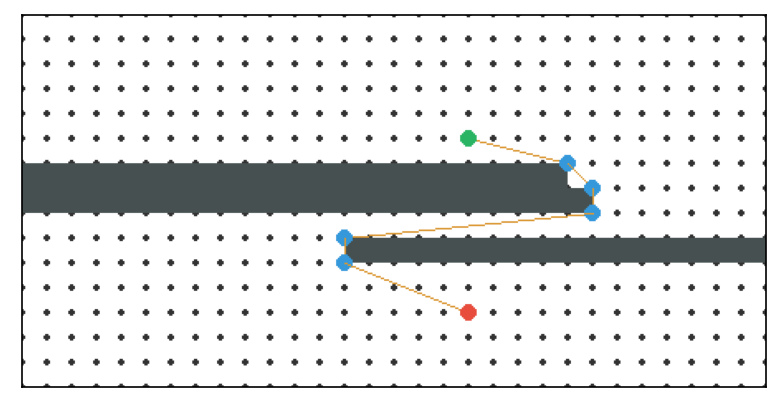

CPU times: user 298 ms, sys: 168 ms, total: 466 ms
Wall time: 239 ms


In [13]:
%time res = simple_test(theta_ap, 6, theta_heuristic, SearchTreePQS)